<span style="font-family: Arial; font-weight:bold;font-size:3em;color:#0e92ea;">  Project - Unsupervised Learning


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;"> Name: Panagam Mohitha

**Domain:** Banking, Finance

**Context:** This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

**Attribute Information:** 
* **CUSTID** : Identification of Credit Card holder (Categorical)
* **BALANCE**: Balance amount left in their account to make purchases 
* **BALANCEFREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES** : Amount of purchases made from account
* **ONEOFFPURCHASES** : Maximum purchase amount done in one-go
* **INSTALLMENTSPURCHASES** : Amount of purchase done in installment
* **CASHADVANCE** : Cash in advance given by the user
* **PURCHASESFREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASESINSTALLMENTSFREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
* **CASHADVANCETRX** : Number of Transactions made with "Cash in Advance"
* **PURCHASESTRX** : Number of purchase transactions made
* **CREDITLIMIT** : Limit of Credit Card for user
* **PAYMENTS** : Amount of Payment done by user
* **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
* **PRCFULLPAYMENT** : Percent of full payment paid by user
* **TENURE** : Tenure of credit card service for user


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  1. Preprocessing the data 

In [559]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns


## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [560]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.3f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> a. Check a few observations and get familiar with the data.

In [561]:
# reading the CSV file into pandas dataframe
cc_data = pd.read_csv('C:\\Users\\Mohitha Panagam\\Downloads\\Project\\data_credit_card.csv')

In [562]:
# to display the top 10 rows of the dataframe
cc_data.head(10)

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001   40.901              0.818     95.400             0.000   
1  C10002 3202.467              0.909      0.000             0.000   
2  C10003 2495.149              1.000    773.170           773.170   
3  C10004 1666.671              0.636   1499.000          1499.000   
4  C10005  817.714              1.000     16.000            16.000   
5  C10006 1809.829              1.000   1333.280             0.000   
6  C10007  627.261              1.000   7091.010          6402.630   
7  C10008 1823.653              1.000    436.200             0.000   
8  C10009 1014.926              1.000    861.490           661.490   
9  C10010  152.226              0.545   1281.600          1281.600   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  95.400         0.000                0.167   
1                   0.000      6442.945                0.000   
2                   0.000         0.000                1.000   
3                   0.000       205.788                0.083   
4                   0.000         0.000                0.083   
5                1333.280         0.000                0.667   
6                 688.380         0.000                1.000   
7                 436.200         0.000                1.000   
8                 200.000         0.000                0.333   
9                   0.000         0.000                0.167   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.083   
1                       0.000                             0.000   
2                       1.000                             0.000   
3                       0.083                             0.000   
4                       0.083                             0.000   
5                       0.000                             0.583   
6                       1.000                             1.000   
7                       0.000                             1.000   
8                       0.083                             0.250   
9                       0.167                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000                 0              2      1000.000   
1                   0.250                 4              0      7000.000   
2                   0.000                 0             12      7500.000   
3                   0.083                 1              1      7500.000   
4                   0.000                 0              1      1200.000   
5                   0.000                 0              8      1800.000   
6                   0.000                 0             64     13500.000   
7                   0.000                 0             12      2300.000   
8                   0.000                 0              5      7000.000   
9                   0.000                 0              3     11000.000   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802           139.510             0.000      12  
1  4103.033          1072.340             0.222      12  
2   622.067           627.285             0.000      12  
3     0.000               NaN             0.000      12  
4   678.335           244.791             0.000      12  
5  1400.058          2407.246             0.000      12  
6  6354.314           198.066             1.000      12  
7   679.065           532.034             0.000      12  
8   688.279           311.963             0.000      12  
9  1164.771           100.302             0.000      12

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> b. Check the size and info of the data set.

In [563]:
# to display the dimension of the dataframe
cc_data.shape

(8950, 18)

**Inference:**
* There are 8950 Observations / Rows and 18 Attributes / Columns.

In [564]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Inference:**
* All the variables are numerical attributes except CUST_ID is a categorical attribute.

In [565]:
# to display the column names of the dataframe
cc_data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [566]:
# check the datatypes
cc_data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> c. Check for missing values. Impute the missing values if there is any.

In [567]:
#check the missing values.
cc_data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [568]:
# CREDIT_LIMIT  and MINIMUM_PAYMENTS has missing values so we need to remove with median.
cc_data['CREDIT_LIMIT'].fillna(cc_data['CREDIT_LIMIT'].median(),inplace=True)

cc_data['CREDIT_LIMIT'].count()


cc_data['MINIMUM_PAYMENTS'].median()
cc_data['MINIMUM_PAYMENTS'].fillna(cc_data['MINIMUM_PAYMENTS'].median(),inplace=True)

In [569]:
# Now again check the missing values.
cc_data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

**Inference:**
* Since there are missing values in the data so those attributes are imputing them with median.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> d. Drop unnecessary columns.

In [570]:
cols_to_drop = ['CUST_ID']
cc_data = cc_data.drop(cols_to_drop, axis=1)

In [571]:
cc_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

**Inference:**
* CUST_ID is an unnecessary column for building model so it is dropped.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> e. Check correlation among features and comment your findings.

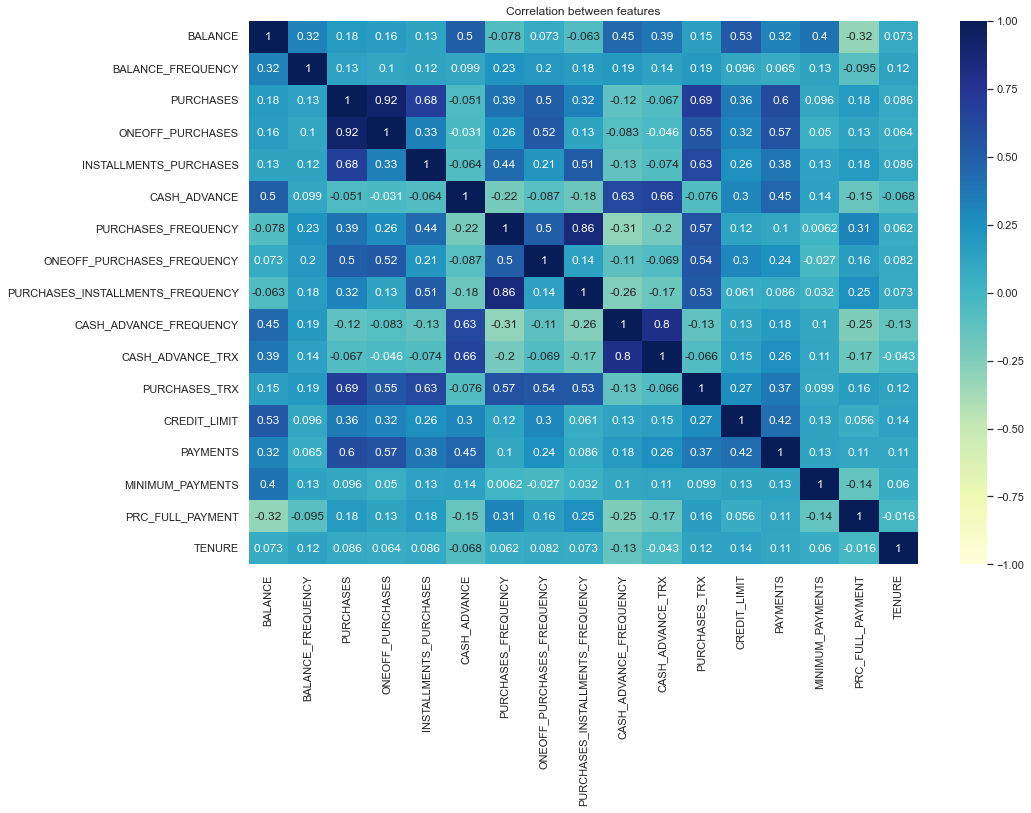

In [502]:
# To get a correlation matrix 
# Ploting correlation plot
corr = cc_data.iloc[:, :17].corr() 
plt.figure(figsize=(15, 10))

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 12})

# specify name of the plot
plt.title('Correlation between features')
plt.show()

**Inference:**
* ONEOFF_PURCHASES and PURCHASES have highest correlation
* PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_FREQUENCY have high correlation
* There is positive correlation between attributes of transcation and frequency such as CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX

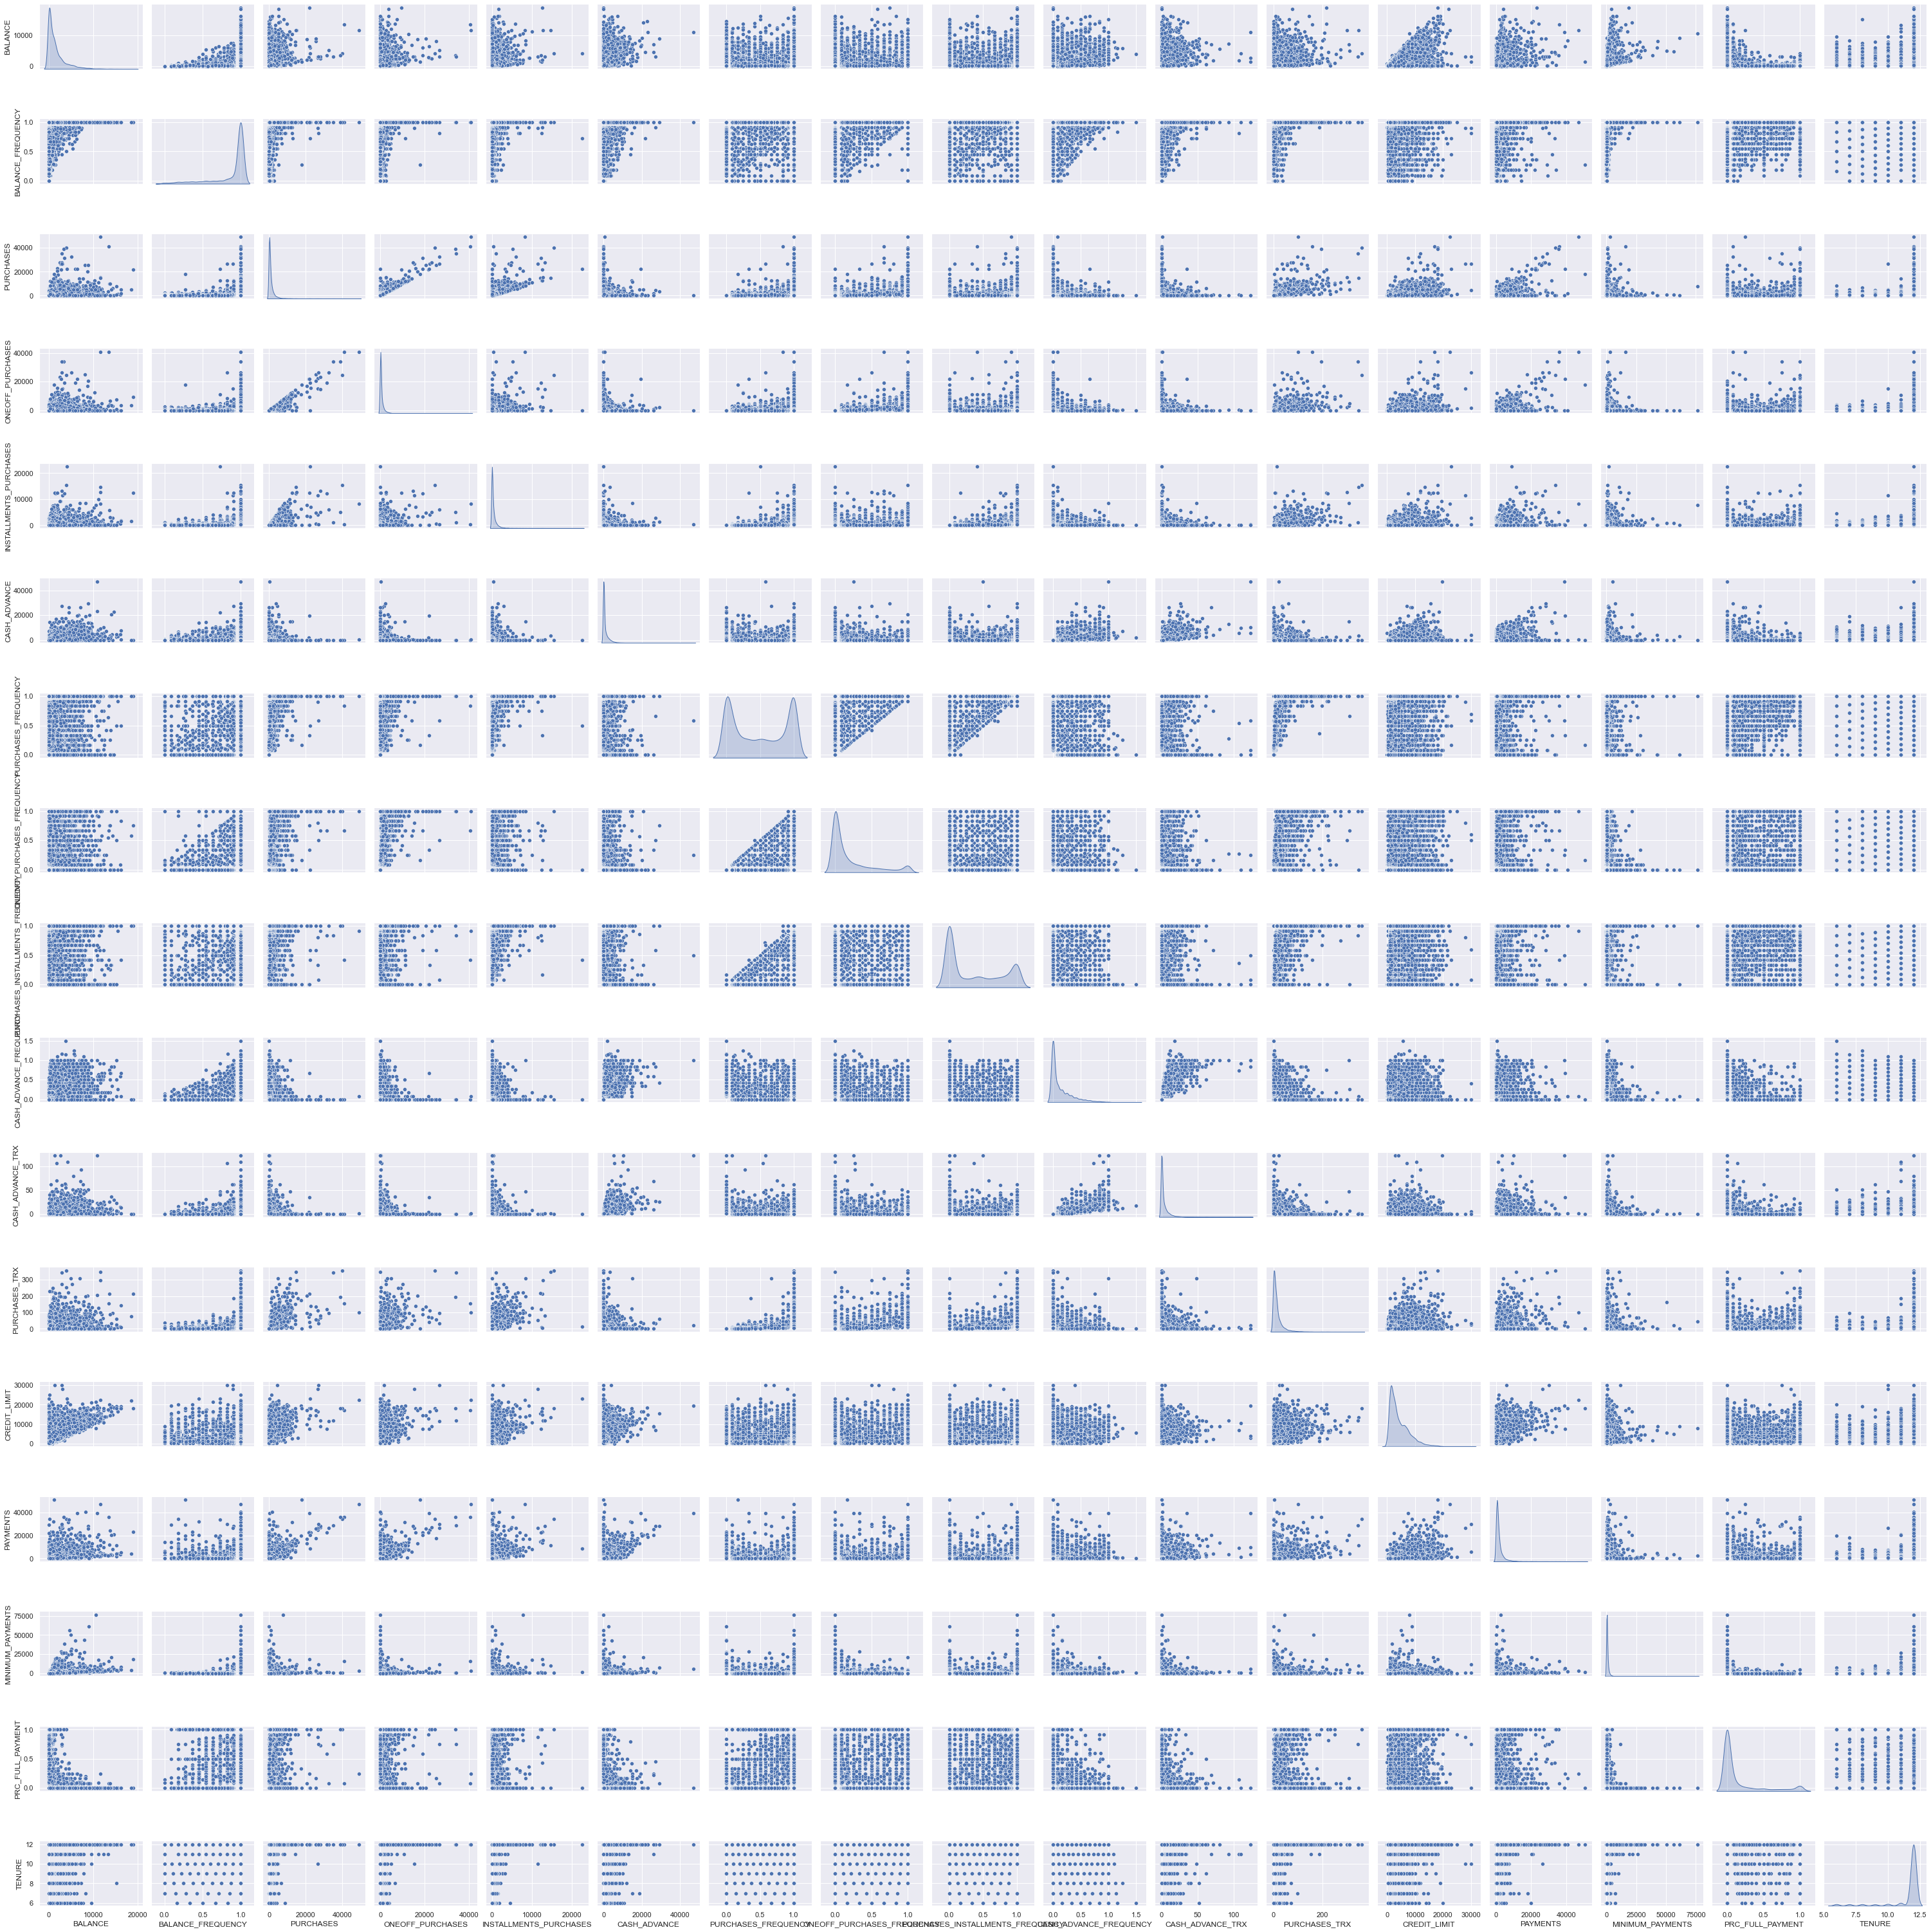

In [503]:
sns.pairplot(cc_data.iloc[:,:17], diag_kind='kde')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> f. Check distribution of features and comment your findings.

In [504]:
# describe the numerical data
cc_data.describe()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
count  8950.000           8950.000   8950.000          8950.000   
mean   1564.475              0.877   1003.205           592.437   
std    2081.532              0.237   2136.635          1659.888   
min       0.000              0.000      0.000             0.000   
25%     128.282              0.889     39.635             0.000   
50%     873.385              1.000    361.280            38.000   
75%    2054.140              1.000   1110.130           577.405   
max   19043.139              1.000  49039.570         40761.250   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                8950.000      8950.000             8950.000   
mean                  411.068       978.871                0.490   
std                   904.338      2097.164                0.401   
min                     0.000         0.000                0.000   
25%                     0.000         0.000                0.083   
50%                    89.000         0.000                0.500   
75%                   468.637      1113.821                0.917   
max                 22500.000     47137.212                1.000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                    8950.000                          8950.000   
mean                        0.202                             0.364   
std                         0.298                             0.397   
min                         0.000                             0.000   
25%                         0.000                             0.000   
50%                         0.083                             0.167   
75%                         0.300                             0.750   
max                         1.000                             1.000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                8950.000          8950.000       8950.000      8950.000   
mean                    0.135             3.249         14.710      4494.282   
std                     0.200             6.825         24.858      3638.647   
min                     0.000             0.000          0.000        50.000   
25%                     0.000             0.000          1.000      1600.000   
50%                     0.000             0.000          7.000      3000.000   
75%                     0.222             4.000         17.000      6500.000   
max                     1.500           123.000        358.000     30000.000   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
count  8950.000          8950.000          8950.000 8950.000  
mean   1733.144           844.907             0.154   11.517  
std    2895.064          2332.792             0.292    1.338  
min       0.000             0.019             0.000    6.000  
25%     383.276           170.858             0.000   12.000  
50%     856.902           312.344             0.000   12.000  
75%    1901.134           788.714             0.143   12.000  
max   50721.483         76406.208             1.000   12.000

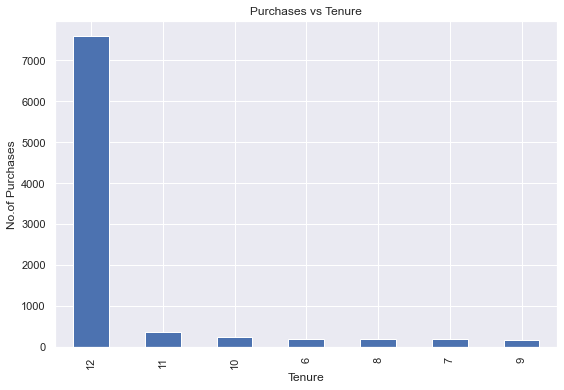

In [505]:
plt.figure(figsize=(9,6))
top_cities = cc_data.groupby(['TENURE'])['PURCHASES'].count().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Purchases vs Tenure')
plt.xlabel('Tenure')
plt.ylabel('No.of Purchases')
plt.show()

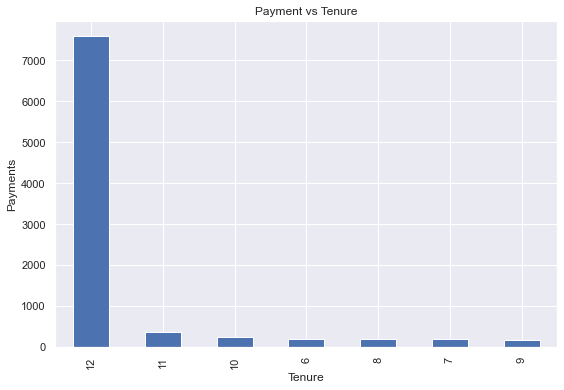

In [506]:
plt.figure(figsize=(9,6))
top_cities = cc_data.groupby(['TENURE'])['PAYMENTS'].count().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Payment vs Tenure')
plt.xlabel('Tenure')
plt.ylabel('Payments')
plt.show()

<AxesSubplot:xlabel='PURCHASES_INSTALLMENTS_FREQUENCY', ylabel='Density'>

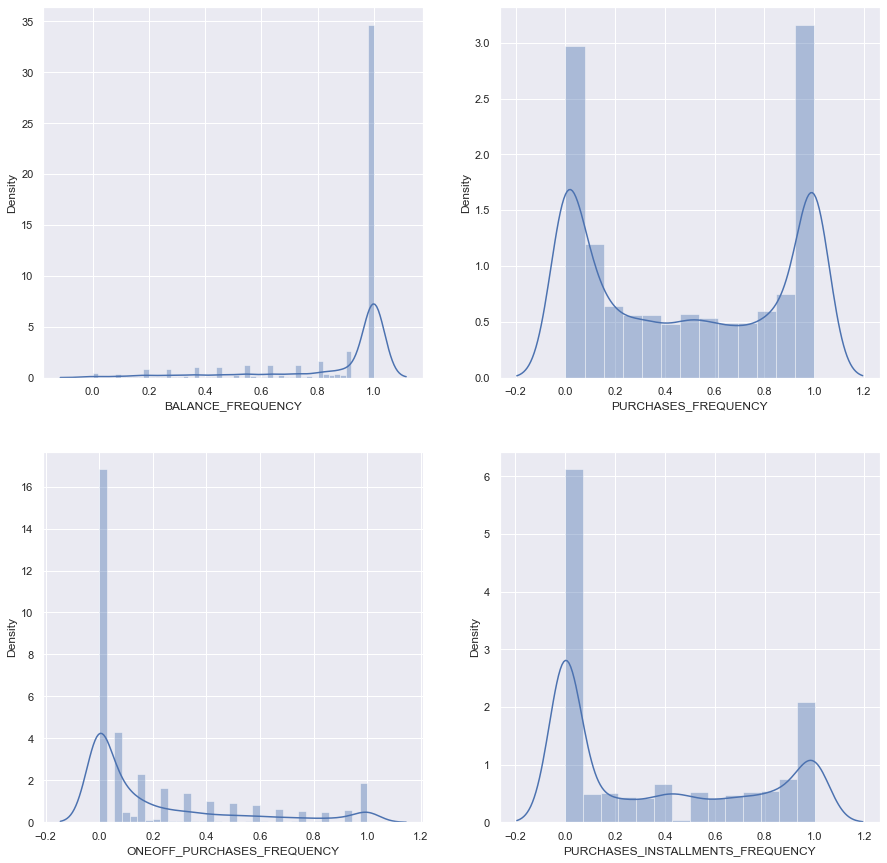

In [507]:
sns.set()
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.distplot(cc_data['BALANCE_FREQUENCY'], ax=axes[0,0])
sns.distplot(cc_data['PURCHASES_FREQUENCY'],ax=axes[0,1])
sns.distplot(cc_data['ONEOFF_PURCHASES_FREQUENCY'], ax=axes[1,0])
sns.distplot(cc_data['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=axes[1,1])

<AxesSubplot:xlabel='CASH_ADVANCE_TRX', ylabel='Density'>

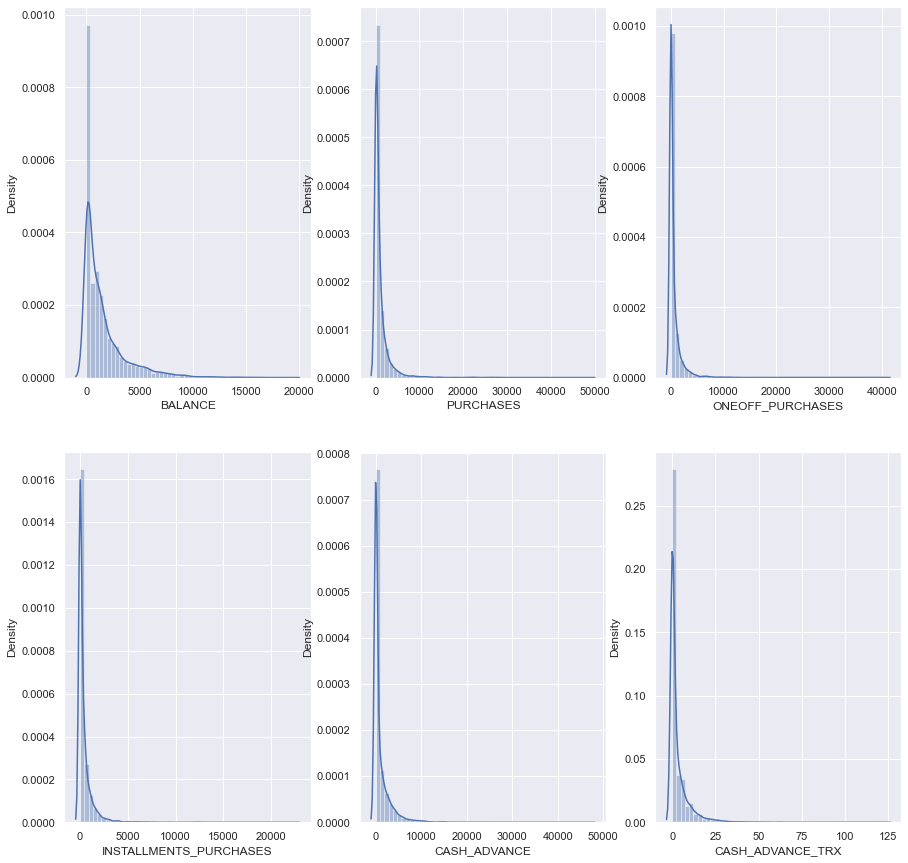

In [508]:
sns.set()

fig, axes = plt.subplots(2, 3, figsize=(15, 15))
sns.distplot(cc_data['BALANCE'], ax=axes[0,0])
sns.distplot(cc_data['PURCHASES'],ax=axes[0,1])
sns.distplot(cc_data['ONEOFF_PURCHASES'], ax=axes[0,2])
sns.distplot(cc_data['INSTALLMENTS_PURCHASES'], ax=axes[1,0])
sns.distplot(cc_data['CASH_ADVANCE'], ax=axes[1,1])
sns.distplot(cc_data['CASH_ADVANCE_TRX'], ax=axes[1,2])

**Inference:**
* Most of the payments and purchases done with the tenure of 12.
* Balance_frequency is right skewed and ONEOFF_PURCHASES_FREQUENCY is left skewed. This explains that users update their balance frequently but rarely opt for one go purchases.
* Major share of users fall below 10k in purchases and oneoff_purchases.Very few use cash_advance for more than 10k purchase.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> g. Standardize the data using appropriate methods. 

In [572]:
# To put data on the same scale 
from sklearn.preprocessing import StandardScaler
features = cc_data.columns
sc = StandardScaler()
cc_data_scaled = sc.fit_transform(cc_data)
data = pd.DataFrame(cc_data_scaled, columns=cc_data.columns)
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   -0.732             -0.249     -0.425            -0.357   
1    0.787              0.134     -0.470            -0.357   
2    0.447              0.518     -0.108             0.109   
3    0.049             -1.017      0.232             0.546   
4   -0.359              0.518     -0.462            -0.347   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349        -0.467               -0.806   
1                  -0.455         2.606               -1.222   
2                  -0.455        -0.467                1.270   
3                  -0.455        -0.369               -1.014   
4                  -0.455        -0.467               -1.014   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.679                            -0.707   
1                      -0.679                            -0.917   
2                       2.673                            -0.917   
3                      -0.399                            -0.917   
4                      -0.399                            -0.917   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675            -0.476         -0.511        -0.960   
1                   0.574             0.110         -0.592         0.689   
2                  -0.675            -0.476         -0.109         0.826   
3                  -0.259            -0.330         -0.552         0.826   
4                  -0.675            -0.476         -0.552        -0.905   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    -0.529            -0.302            -0.526   0.361  
1     0.819             0.097             0.234   0.361  
2    -0.384            -0.093            -0.526   0.361  
3    -0.599            -0.228            -0.526   0.361  
4    -0.364            -0.257            -0.526   0.361

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  3. Apply PCA to the dataset and perform all steps from Q2 on the new features generated using PCA.

In [573]:
# With the help of principal component analysis we will reduce features
from sklearn.decomposition import PCA

In [574]:
cc_data.shape

(8950, 17)

In [575]:
#We have 17 features so our n_component will be 17.
pc=PCA(n_components=17)
cc_data_pca=pc.fit(cc_data_scaled)

In [576]:
sum(cc_data_pca.explained_variance_ratio_)

1.0000000000000002

In [577]:
var_ratio={}
for n in range(2,18):
    pc=PCA(n_components=n)
    cc_data_pca=pc.fit(cc_data_scaled)
    var_ratio[n]=sum(cc_data_pca.explained_variance_ratio_)

In [578]:
var_ratio

{2: 0.4761145096038464,
 3: 0.5642463262126608,
 4: 0.6390415683340281,
 5: 0.7012888630326691,
 6: 0.7586894275299021,
 7: 0.8075236830564568,
 8: 0.850515715540971,
 9: 0.8884983024975869,
 10: 0.9192983251775998,
 11: 0.9430208355910034,
 12: 0.960754531954597,
 13: 0.9750331004392295,
 14: 0.9872022960817174,
 15: 0.9973289663784978,
 16: 0.9999993147732045,
 17: 1.0000000000000002}

In [579]:
#Since 10 components are explaining about 90% variance so we select 9 components
pc=PCA(n_components=10)

In [580]:
p=pc.fit(cc_data_scaled)

In [581]:
cc_data_scaled.shape

(8950, 17)

In [582]:
p.explained_variance_

array([4.64112269, 3.45372843, 1.49840831, 1.27166123, 1.05832222,
       0.97591864, 0.83027511, 0.73094622, 0.64577613, 0.52365889])

In [583]:
np.sum(p.explained_variance_)

15.629817876385282

In [584]:
var_ratio

{2: 0.4761145096038464,
 3: 0.5642463262126608,
 4: 0.6390415683340281,
 5: 0.7012888630326691,
 6: 0.7586894275299021,
 7: 0.8075236830564568,
 8: 0.850515715540971,
 9: 0.8884983024975869,
 10: 0.9192983251775998,
 11: 0.9430208355910034,
 12: 0.960754531954597,
 13: 0.9750331004392295,
 14: 0.9872022960817174,
 15: 0.9973289663784978,
 16: 0.9999993147732045,
 17: 1.0000000000000002}

<AxesSubplot:>

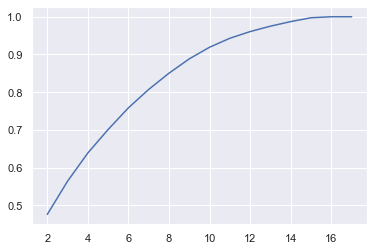

In [585]:
pd.Series(var_ratio).plot()

In [586]:
#Since 9 components are explaining about 88% variance so we select 9 components
cc_data_scaled.shape

(8950, 17)

In [587]:
pc_final=PCA(n_components=10).fit(cc_data_scaled)

reduced_cc_data=pc_final.fit_transform(cc_data_scaled)

In [588]:
dd=pd.DataFrame(reduced_cc_data)

In [589]:
dd.head()

0      1     2      3      4      5      6      7      8      9
0 -1.684 -1.072 0.476  0.680  0.043  0.068  0.822 -0.019  0.118 -0.078
1 -1.134  2.509 0.602 -0.110  0.663 -1.102 -0.384  0.176  0.674 -0.778
2  0.969 -0.384 0.091  1.238 -2.167 -0.320 -1.542 -0.229 -0.868 -0.002
3 -0.888  0.005 1.500  1.075  0.226 -0.172 -0.237 -0.690 -0.064  0.394
4 -1.600 -0.684 0.348  1.014 -0.454  0.077  0.698  0.245  0.578 -0.122

In [590]:
# initially we had 17 variables now its 9 so our variable go reduced
dd.shape

(8950, 10)

In [591]:
col_list=cc_data.columns

In [592]:
col_list

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [593]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(10)],index=col_list)

PC_0   PC_1   PC_2   PC_3   PC_4   PC_5  \
BALANCE                           0.102  0.404 -0.162  0.279  0.051  0.043   
BALANCE_FREQUENCY                 0.120  0.131 -0.423  0.156 -0.477  0.022   
PURCHASES                         0.412  0.040  0.257  0.042  0.028  0.180   
ONEOFF_PURCHASES                  0.346  0.062  0.391  0.085 -0.161  0.180   
INSTALLMENTS_PURCHASES            0.337 -0.019 -0.109 -0.058  0.361  0.096   
CASH_ADVANCE                     -0.023  0.439 -0.023 -0.257  0.098 -0.145   
PURCHASES_FREQUENCY               0.321 -0.191 -0.371 -0.195 -0.100 -0.047   
ONEOFF_PURCHASES_FREQUENCY        0.294 -0.019  0.116  0.034 -0.540 -0.004   
PURCHASES_INSTALLMENTS_FREQUENCY  0.274 -0.179 -0.470 -0.225  0.177 -0.048   
CASH_ADVANCE_FREQUENCY           -0.089  0.434 -0.105 -0.265 -0.145  0.058   
CASH_ADVANCE_TRX                 -0.048  0.420 -0.110 -0.328 -0.084 -0.065   
PURCHASES_TRX                     0.391 -0.020 -0.076 -0.021 -0.036  0.101   
CREDIT_LIMIT                      0.212  0.238  0.101  0.132  0.086 -0.320   
PAYMENTS                          0.266  0.257  0.277 -0.112  0.201 -0.116   
MINIMUM_PAYMENTS                  0.063  0.169 -0.235  0.393  0.415  0.290   
PRC_FULL_PAYMENT                  0.132 -0.190  0.126 -0.420  0.143 -0.353   
TENURE                            0.081 -0.004 -0.068  0.438 -0.002 -0.745   

                                   PC_6   PC_7   PC_8   PC_9  
BALANCE                          -0.254 -0.170  0.129  0.031  
BALANCE_FREQUENCY                 0.101  0.283  0.616 -0.082  
PURCHASES                         0.200  0.026  0.105  0.051  
ONEOFF_PURCHASES                  0.121  0.127  0.014 -0.175  
INSTALLMENTS_PURCHASES            0.252 -0.172  0.222  0.443  
CASH_ADVANCE                     -0.049 -0.022 -0.049 -0.359  
PURCHASES_FREQUENCY              -0.151 -0.048 -0.218 -0.251  
ONEOFF_PURCHASES_FREQUENCY       -0.281  0.081 -0.400  0.110  
PURCHASES_INSTALLMENTS_FREQUENCY  0.038 -0.161 -0.067 -0.253  
CASH_ADVANCE_FREQUENCY            0.144  0.046 -0.087  0.286  
CASH_ADVANCE_TRX                  0.199  0.101 -0.255  0.219  
PURCHASES_TRX                     0.109 -0.102 -0.199  0.249  
CREDIT_LIMIT                     -0.557 -0.341  0.158  0.158  
PAYMENTS                          0.157  0.087  0.090 -0.466  
MINIMUM_PAYMENTS                 -0.200  0.570 -0.294 -0.005  
PRC_FULL_PAYMENT                 -0.300  0.573  0.233  0.241  
TENURE                            0.404  0.096 -0.206  0.054

**Inference:**
* So above data gave us eigen vector for each component we had all eigen vector value very small we can remove those variable but in this case its not.

In [594]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(10)])

PC_0   0.273
PC_1   0.203
PC_2   0.088
PC_3   0.075
PC_4   0.062
PC_5   0.057
PC_6   0.049
PC_7   0.043
PC_8   0.038
PC_9   0.031
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  2. Build a k-means algorithm for clustering credit card data. Kindly follow the below steps and answer the following.

In [595]:
#Assuming no.of clusters =4
from sklearn.cluster import KMeans

In [596]:
km_4=KMeans(n_clusters=4,random_state=123)

In [597]:
km_4.fit(data)

KMeans(n_clusters=4, random_state=123)

In [598]:
km_4.labels_

array([2, 1, 3, ..., 3, 2, 2])

In [599]:
pd.Series(km_4.labels_).value_counts()

2    3977
3    3367
1    1197
0     409
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> a. Build k means model on various k values and plot the inertia against various k values.

In [600]:
cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( data )
    cluster_errors.append( clusters.inertia_ )

In [601]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

num_clusters  cluster_errors
0              1      152150.000
1              2      127784.573
2              3      111973.990
3              4       99061.940
4              5       91491.608
5              6       84826.621
6              7       79506.847
7              8       74465.983
8              9       69840.515
9             10       66459.760
10            11       63618.827
11            12       61357.139
12            13       59133.096
13            14       57481.073
14            15       55815.648
15            16       54426.358
16            17       53002.692
17            18       51906.246
18            19       50348.935
19            20       49972.905

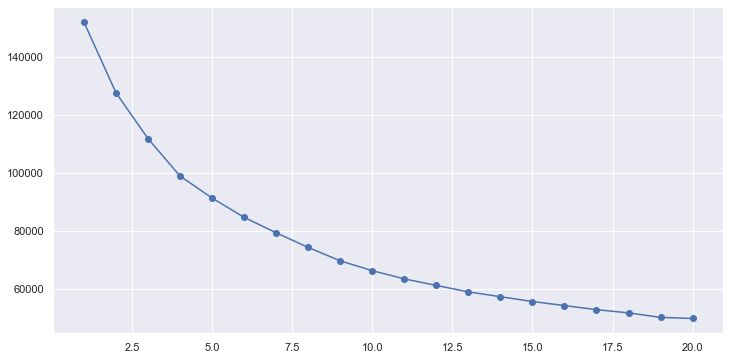

In [602]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> b. Evaluate the model using Silhouette coefficient

In [603]:
from sklearn import metrics

In [604]:
#using silhouette score: Higher the value, better the cluster.
from sklearn.metrics import silhouette_score

# create a list for different values of K
n_clusters = [2, 3, 4, 5, 6,7,8,9]

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(data)
    score = silhouette_score(data, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.20951117145873602)
For n_clusters = 3, silhouette score is 0.2506116638886035)
For n_clusters = 4, silhouette score is 0.1976791965228765)
For n_clusters = 5, silhouette score is 0.19325195080511473)
For n_clusters = 6, silhouette score is 0.20286011584987834)
For n_clusters = 7, silhouette score is 0.21456513775079983)
For n_clusters = 8, silhouette score is 0.22193282658122515)
For n_clusters = 9, silhouette score is 0.21569986719782255)


In [605]:
# calculate SC for K=3 through K=21
k_range = range(2, 21)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(data)
    scores.append(metrics.silhouette_score(data, km.labels_))

In [606]:
scores

[0.20949692655850133,
 0.25094878327513914,
 0.1976911456779212,
 0.19325195080511473,
 0.20282934577578765,
 0.21474509359961605,
 0.22204404116809873,
 0.21549380253155773,
 0.22020848165025195,
 0.21924048257110365,
 0.2193433960056921,
 0.21891552422536958,
 0.2201449360668657,
 0.20286428711384824,
 0.20297722558281397,
 0.22016598510750354,
 0.16991219754345324,
 0.20478753738317101,
 0.20769150746882784]

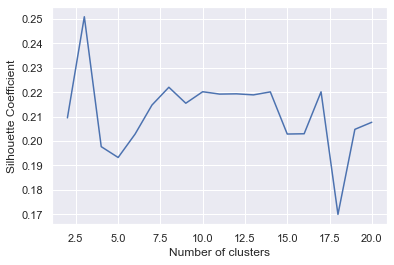

In [607]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

**Inference:**
* using silhouette score: Higher the value, better the cluster. 
* silhouette score is high at 3 and 8

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> c. Plot a elbow plot to find the optimal value of k

In [608]:
from scipy.stats import zscore

cc_attributes=cc_data.iloc[:,1:]
cc_datascaled=cc_attributes.apply(zscore)


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

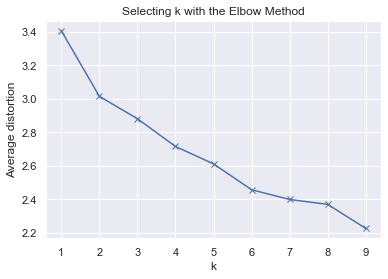

In [609]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cc_datascaled)
    prediction=model.predict(cc_datascaled)
    meanDistortions.append(sum(np.min(cdist(cc_datascaled, model.cluster_centers_, 'euclidean'), axis=1))/cc_datascaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

**Inference:**
* from the above graph, it bends at 2, 6 
* Though the bend is not coming out clearly as there are many bends, let us look at 2 clusters and 6 clusters

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#008080;"> d. Which k value gives the best result?

In [610]:
# Let us first start with K = 2 from elbow point
final_model=KMeans(2)
final_model.fit(cc_datascaled)
prediction=final_model.predict(cc_datascaled)

#Append the prediction 
cc_data["GROUP"] = prediction
cc_datascaled["GROUP"] = prediction
print("Groups Assigned : \n")
cc_data.head()

Groups Assigned : 



BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   40.901              0.818     95.400             0.000   
1 3202.467              0.909      0.000             0.000   
2 2495.149              1.000    773.170           773.170   
3 1666.671              0.636   1499.000          1499.000   
4  817.714              1.000     16.000            16.000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  95.400         0.000                0.167   
1                   0.000      6442.945                0.000   
2                   0.000         0.000                1.000   
3                   0.000       205.788                0.083   
4                   0.000         0.000                0.083   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.083   
1                       0.000                             0.000   
2                       1.000                             0.000   
3                       0.083                             0.000   
4                       0.083                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000                 0              2      1000.000   
1                   0.250                 4              0      7000.000   
2                   0.000                 0             12      7500.000   
3                   0.083                 1              1      7500.000   
4                   0.000                 0              1      1200.000   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  GROUP  
0   201.802           139.510             0.000      12      0  
1  4103.033          1072.340             0.222      12      0  
2   622.067           627.285             0.000      12      1  
3     0.000           312.344             0.000      12      0  
4   678.335           244.791             0.000      12      0

In [611]:
cc_cluster = cc_data.groupby(['GROUP'])
cc_cluster.mean()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
GROUP                                                            
0     1671.096              0.828    277.894           201.238   
1     1411.645              0.948   2042.857          1153.177   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
GROUP                                                              
0                      76.933      1341.861                0.199   
1                     890.012       458.565                0.908   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
GROUP                                                                 
0                           0.089                             0.107   
1                           0.365                             0.733   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
GROUP                                                                          
0                       0.188             4.502          3.396      4041.428   
1                       0.060             1.453         30.927      5143.399   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
GROUP                                                        
0      1396.350           823.431             0.073  11.401  
1      2215.900           875.690             0.270  11.684

0    [[AxesSubplot(0.1,0.77069;0.173913x0.12931), A...
1    [[AxesSubplot(0.1,0.77069;0.173913x0.12931), A...
dtype: object

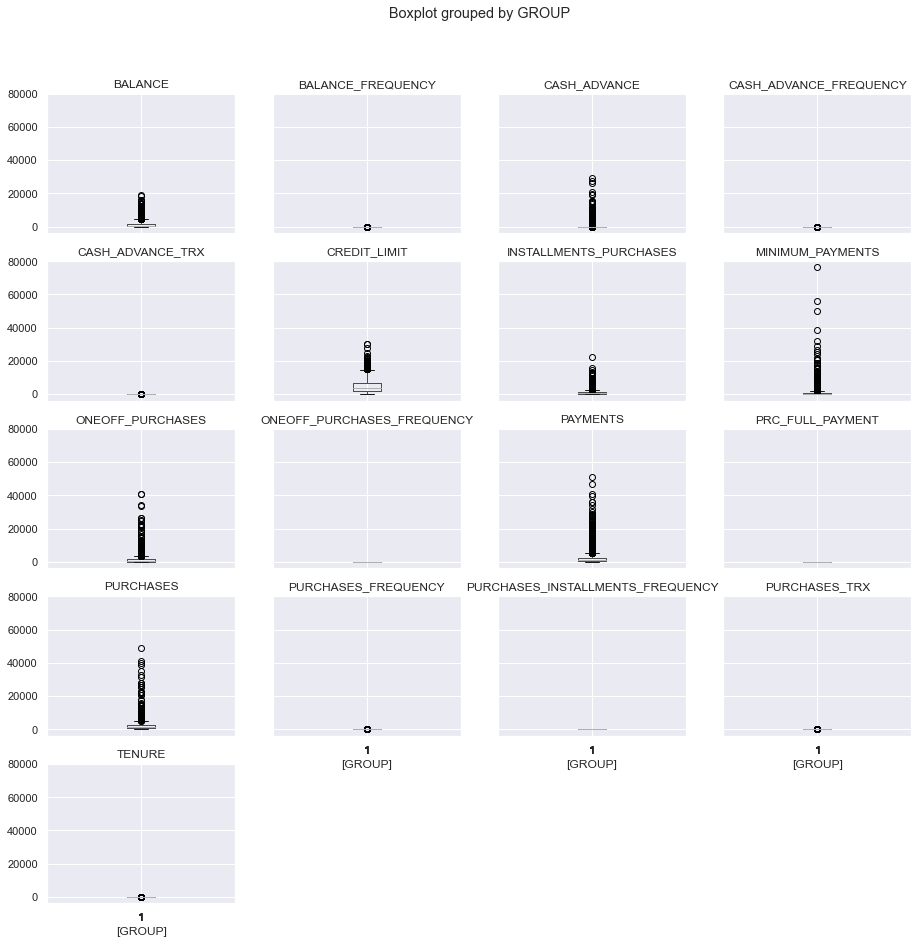

In [612]:
cc_cluster.boxplot(by='GROUP', layout = (3,3),figsize=(15,15))

In [613]:
# Let us first start with K = 3 from silhouette score
final_model=KMeans(3)
final_model.fit(cc_datascaled)
prediction=final_model.predict(cc_datascaled)

#Append the prediction 
cc_data["GROUP"] = prediction
cc_datascaled["GROUP"] = prediction
print("Groups Assigned : \n")
cc_data.head()

Groups Assigned : 



BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   40.901              0.818     95.400             0.000   
1 3202.467              0.909      0.000             0.000   
2 2495.149              1.000    773.170           773.170   
3 1666.671              0.636   1499.000          1499.000   
4  817.714              1.000     16.000            16.000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  95.400         0.000                0.167   
1                   0.000      6442.945                0.000   
2                   0.000         0.000                1.000   
3                   0.000       205.788                0.083   
4                   0.000         0.000                0.083   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.083   
1                       0.000                             0.000   
2                       1.000                             0.000   
3                       0.083                             0.000   
4                       0.083                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000                 0              2      1000.000   
1                   0.250                 4              0      7000.000   
2                   0.000                 0             12      7500.000   
3                   0.083                 1              1      7500.000   
4                   0.000                 0              1      1200.000   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  GROUP  
0   201.802           139.510             0.000      12      0  
1  4103.033          1072.340             0.222      12      0  
2   622.067           627.285             0.000      12      1  
3     0.000           312.344             0.000      12      0  
4   678.335           244.791             0.000      12      0

In [614]:
cc_cluster = cc_data.groupby(['GROUP'])
cc_cluster.mean()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
GROUP                                                            
0     1733.813              0.830    266.530           202.868   
1     1097.017              0.931   1264.568           619.864   
2     3547.524              0.985   7587.562          5025.297   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
GROUP                                                              
0                      63.956      1404.023                0.172   
1                     644.880       326.177                0.882   
2                    2563.710      1486.380                0.945   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
GROUP                                                                 
0                           0.087                             0.084   
1                           0.302                             0.707   
2                           0.732                             0.788   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
GROUP                                                                          
0                       0.196             4.700          3.029      4106.698   
1                       0.053             1.133         22.423      4428.599   
2                       0.113             4.027         88.472      9702.530   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
GROUP                                                        
0      1434.542           835.041             0.065  11.421  
1      1406.648           716.386             0.260  11.603  
2      8113.688          2066.240             0.298  11.935

0    [[AxesSubplot(0.1,0.77069;0.173913x0.12931), A...
1    [[AxesSubplot(0.1,0.77069;0.173913x0.12931), A...
2    [[AxesSubplot(0.1,0.77069;0.173913x0.12931), A...
dtype: object

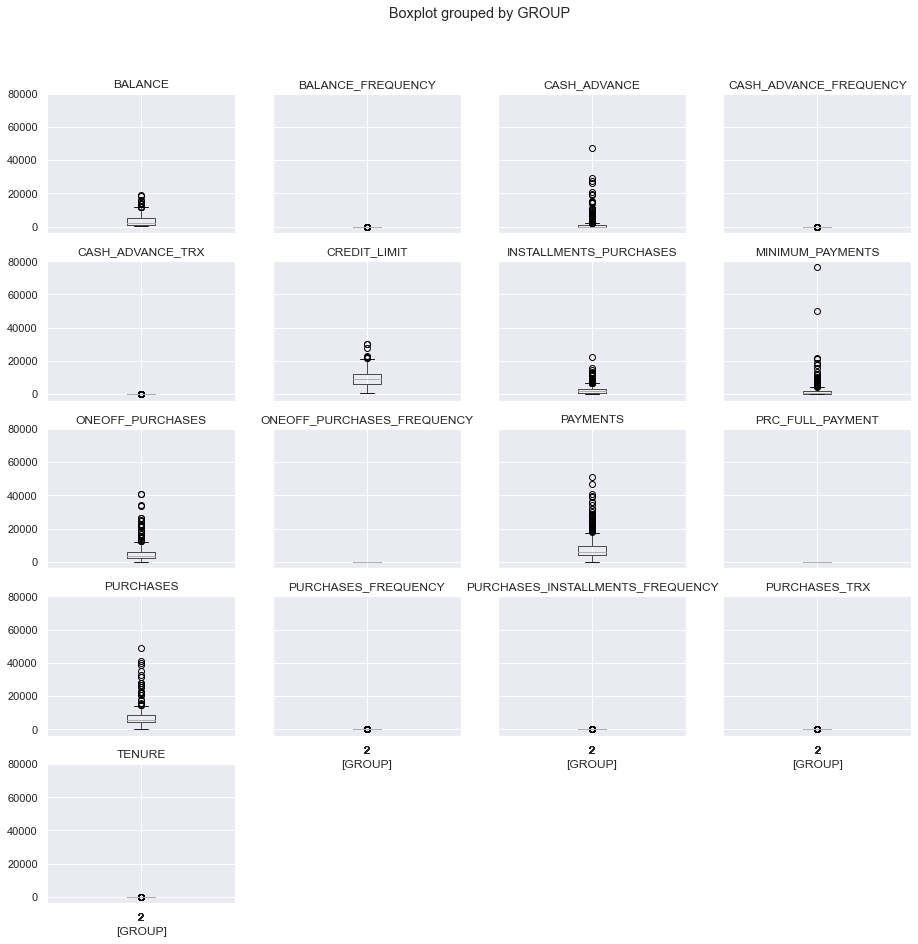

In [615]:
cc_cluster.boxplot(by='GROUP', layout = (3,3),figsize=(15,15))

In [616]:
# Let us first start with K = 6 from elbow point
final_model=KMeans(6)
final_model.fit(cc_datascaled)
prediction=final_model.predict(cc_datascaled)

#Append the prediction 
cc_data["GROUP"] = prediction
cc_datascaled["GROUP"] = prediction
print("Groups Assigned : \n")
cc_data.head()

Groups Assigned : 



BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   40.901              0.818     95.400             0.000   
1 3202.467              0.909      0.000             0.000   
2 2495.149              1.000    773.170           773.170   
3 1666.671              0.636   1499.000          1499.000   
4  817.714              1.000     16.000            16.000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  95.400         0.000                0.167   
1                   0.000      6442.945                0.000   
2                   0.000         0.000                1.000   
3                   0.000       205.788                0.083   
4                   0.000         0.000                0.083   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.083   
1                       0.000                             0.000   
2                       1.000                             0.000   
3                       0.083                             0.000   
4                       0.083                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000                 0              2      1000.000   
1                   0.250                 4              0      7000.000   
2                   0.000                 0             12      7500.000   
3                   0.083                 1              1      7500.000   
4                   0.000                 0              1      1200.000   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  GROUP  
0   201.802           139.510             0.000      12      1  
1  4103.033          1072.340             0.222      12      3  
2   622.067           627.285             0.000      12      5  
3     0.000           312.344             0.000      12      0  
4   678.335           244.791             0.000      12      1

In [617]:
cc_cluster = cc_data.groupby(['GROUP'])
cc_cluster.mean()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
GROUP                                                            
0      117.037              0.362    323.580           208.114   
1     1657.223              0.965    260.371           211.757   
2      852.401              0.946    880.077           198.654   
3     4301.415              0.956    499.996           317.838   
4     4456.574              0.976  16039.635         10886.014   
5     1848.679              0.978   2988.792          2062.421   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
GROUP                                                              
0                     115.704       339.362                0.253   
1                      48.871       804.578                0.160   
2                     681.815       223.325                0.879   
3                     182.268      5177.565                0.288   
4                    5153.620      1041.290                0.928   
5                     926.823       361.242                0.924   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
GROUP                                                                 
0                           0.076                             0.169   
1                           0.097                             0.063   
2                           0.097                             0.817   
3                           0.144                             0.183   
4                           0.770                             0.783   
5                           0.753                             0.569   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
GROUP                                                                          
0                       0.038             0.767          3.921      3753.119   
1                       0.155             2.906          2.957      3418.541   
2                       0.043             0.816         18.121      3426.258   
3                       0.545            16.819          7.675      7384.241   
4                       0.084             2.904        132.494     12354.217   
5                       0.056             1.148         43.805      7026.504   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
GROUP                                                        
0      1093.851           182.762             0.224  11.311  
1       981.840           832.744             0.022  11.546  
2      1034.334           816.676             0.252  11.483  
3      3949.584          1786.000             0.048  11.237  
4     15760.017          3362.101             0.404  11.964  
5      2863.536           731.572             0.283  11.870

0    [[AxesSubplot(0.1,0.77069;0.173913x0.12931), A...
1    [[AxesSubplot(0.1,0.77069;0.173913x0.12931), A...
2    [[AxesSubplot(0.1,0.77069;0.173913x0.12931), A...
3    [[AxesSubplot(0.1,0.77069;0.173913x0.12931), A...
4    [[AxesSubplot(0.1,0.77069;0.173913x0.12931), A...
5    [[AxesSubplot(0.1,0.77069;0.173913x0.12931), A...
dtype: object

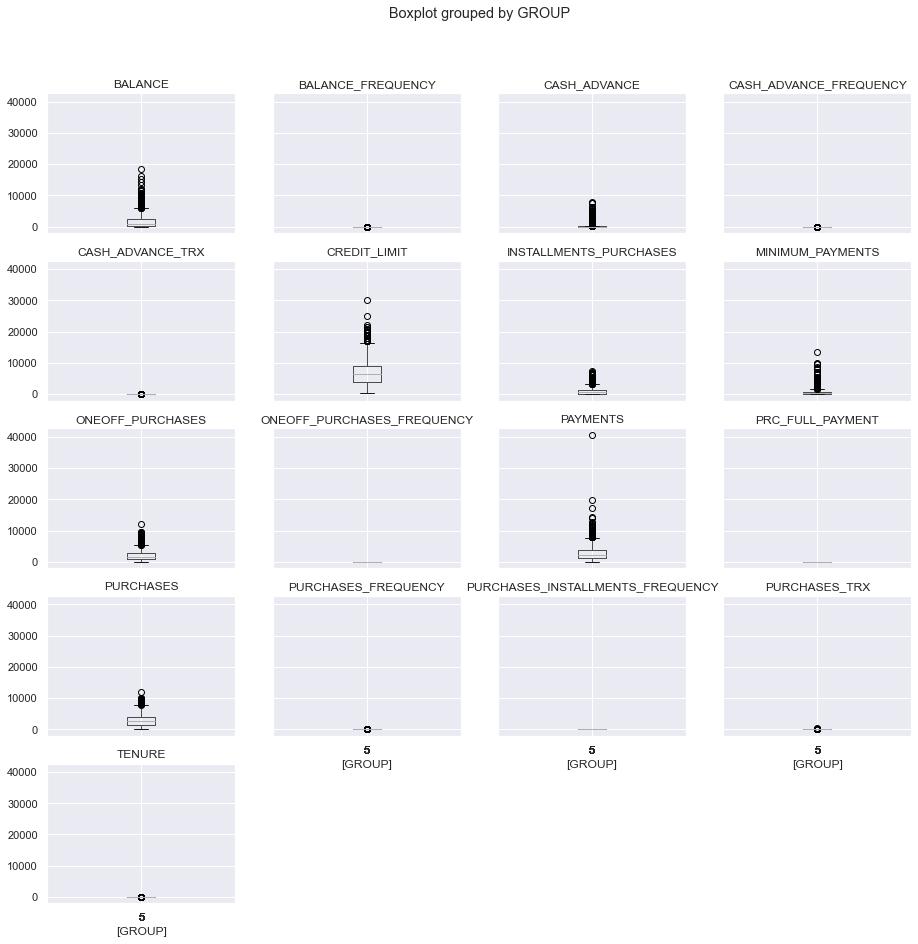

In [620]:
cc_cluster.boxplot(by='GROUP', layout = (3,3),figsize=(15,15))

**Inference:**
* Comparing the box plots of attributes, k=3 is the optimal no.of clusters

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  4. Create a new column as a cluster label in the original data frame and perform cluster analysis. Check the correlation of cluster labels with various features and mention your inferences

In [621]:
# add a column 'cluster' in the data giving cluster number corresponding to each observation
cc_data['cluster'] = kmeans.labels_
cc_data.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   40.901              0.818     95.400             0.000   
1 3202.467              0.909      0.000             0.000   
2 2495.149              1.000    773.170           773.170   
3 1666.671              0.636   1499.000          1499.000   
4  817.714              1.000     16.000            16.000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  95.400         0.000                0.167   
1                   0.000      6442.945                0.000   
2                   0.000         0.000                1.000   
3                   0.000       205.788                0.083   
4                   0.000         0.000                0.083   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.083   
1                       0.000                             0.000   
2                       1.000                             0.000   
3                       0.083                             0.000   
4                       0.083                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000                 0              2      1000.000   
1                   0.250                 4              0      7000.000   
2                   0.000                 0             12      7500.000   
3                   0.083                 1              1      7500.000   
4                   0.000                 0              1      1200.000   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  GROUP  cluster  
0   201.802           139.510             0.000      12      1        0  
1  4103.033          1072.340             0.222      12      3        3  
2   622.067           627.285             0.000      12      5        7  
3     0.000           312.344             0.000      12      0        0  
4   678.335           244.791             0.000      12      1        0

In [622]:
cc_data['cluster'].value_counts()

0     2214
1     1486
11    1069
7      727
4      715
6      650
9      576
3      466
10     455
2      357
8      104
5       75
13      36
12      20
Name: cluster, dtype: int64

In [623]:
# get summary for observations in the cluster
cc_data[cc_data.cluster==0].describe()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
count 2214.000           2214.000   2214.000          2214.000   
mean  1378.859              0.970    205.247           162.625   
std   1066.178              0.077    373.041           343.637   
min      0.488              0.545      0.000             0.000   
25%    598.425              1.000      0.000             0.000   
50%   1156.641              1.000     37.770             0.000   
75%   1845.187              1.000    246.415           160.360   
max   5934.611              1.000   3183.000          3183.000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                2214.000      2214.000             2214.000   
mean                   42.695       607.657                0.128   
std                   134.726       863.701                0.157   
min                     0.000         0.000                0.000   
25%                     0.000         0.000                0.000   
50%                     0.000       212.226                0.083   
75%                     0.000       950.358                0.250   
max                  3000.000      6479.640                0.583   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                    2214.000                          2214.000   
mean                        0.070                             0.056   
std                         0.106                             0.117   
min                         0.000                             0.000   
25%                         0.000                             0.000   
50%                         0.000                             0.000   
75%                         0.083                             0.000   
max                         0.500                             0.500   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                2214.000          2214.000       2214.000      2214.000   
mean                    0.123             2.185          2.222      3135.464   
std                     0.116             2.387          3.194      2355.883   
min                     0.000             0.000          0.000       150.000   
25%                     0.000             0.000          0.000      1500.000   
50%                     0.083             1.000          1.000      2500.000   
75%                     0.167             3.000          4.000      4000.000   
max                     0.500            14.000         29.000     16000.000   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE    GROUP  cluster  
count  2214.000          2214.000          2214.000 2214.000 2214.000 2214.000  
mean    909.044           678.019             0.021   11.889    1.000    0.000  
std    1030.670          1160.340             0.058    0.395    0.056    0.000  
min       0.000             5.038             0.000    9.000    0.000    0.000  
25%     335.686           233.900             0.000   12.000    1.000    0.000  
50%     578.617           402.137             0.000   12.000    1.000    0.000  
75%    1043.001           678.113             0.000   12.000    1.000    0.000  
max    9614.698         13453.345             0.667   12.000    2.000    0.000

<AxesSubplot:xlabel='cluster', ylabel='PURCHASES'>

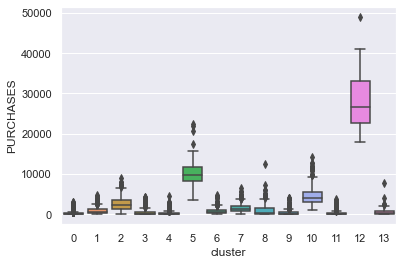

In [624]:
sns.boxplot(cc_data['cluster'],cc_data['PURCHASES'])

<AxesSubplot:xlabel='cluster', ylabel='CREDIT_LIMIT'>

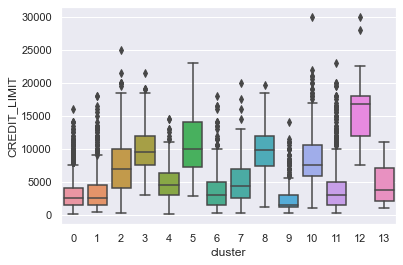

In [625]:
sns.boxplot(cc_data['cluster'],cc_data['CREDIT_LIMIT'])

In [626]:
df_pair_plot=pd.DataFrame(reduced_cc_data,columns=['PC_' +str(i) for i in range(10)])

In [627]:
df_pair_plot['Cluster']=km_4.labels_ #Add cluster column in the data frame

In [628]:
df_pair_plot.head()

PC_0   PC_1  PC_2   PC_3   PC_4   PC_5   PC_6   PC_7   PC_8   PC_9  \
0 -1.684 -1.072 0.476  0.680  0.043  0.068  0.822 -0.019  0.118 -0.078   
1 -1.134  2.509 0.602 -0.110  0.663 -1.102 -0.384  0.176  0.674 -0.778   
2  0.969 -0.384 0.091  1.238 -2.167 -0.320 -1.542 -0.229 -0.868 -0.002   
3 -0.888  0.005 1.500  1.075  0.226 -0.172 -0.237 -0.690 -0.064  0.394   
4 -1.600 -0.684 0.348  1.014 -0.454  0.077  0.698  0.245  0.578 -0.122   

   Cluster  
0        2  
1        1  
2        3  
3        2  
4        2

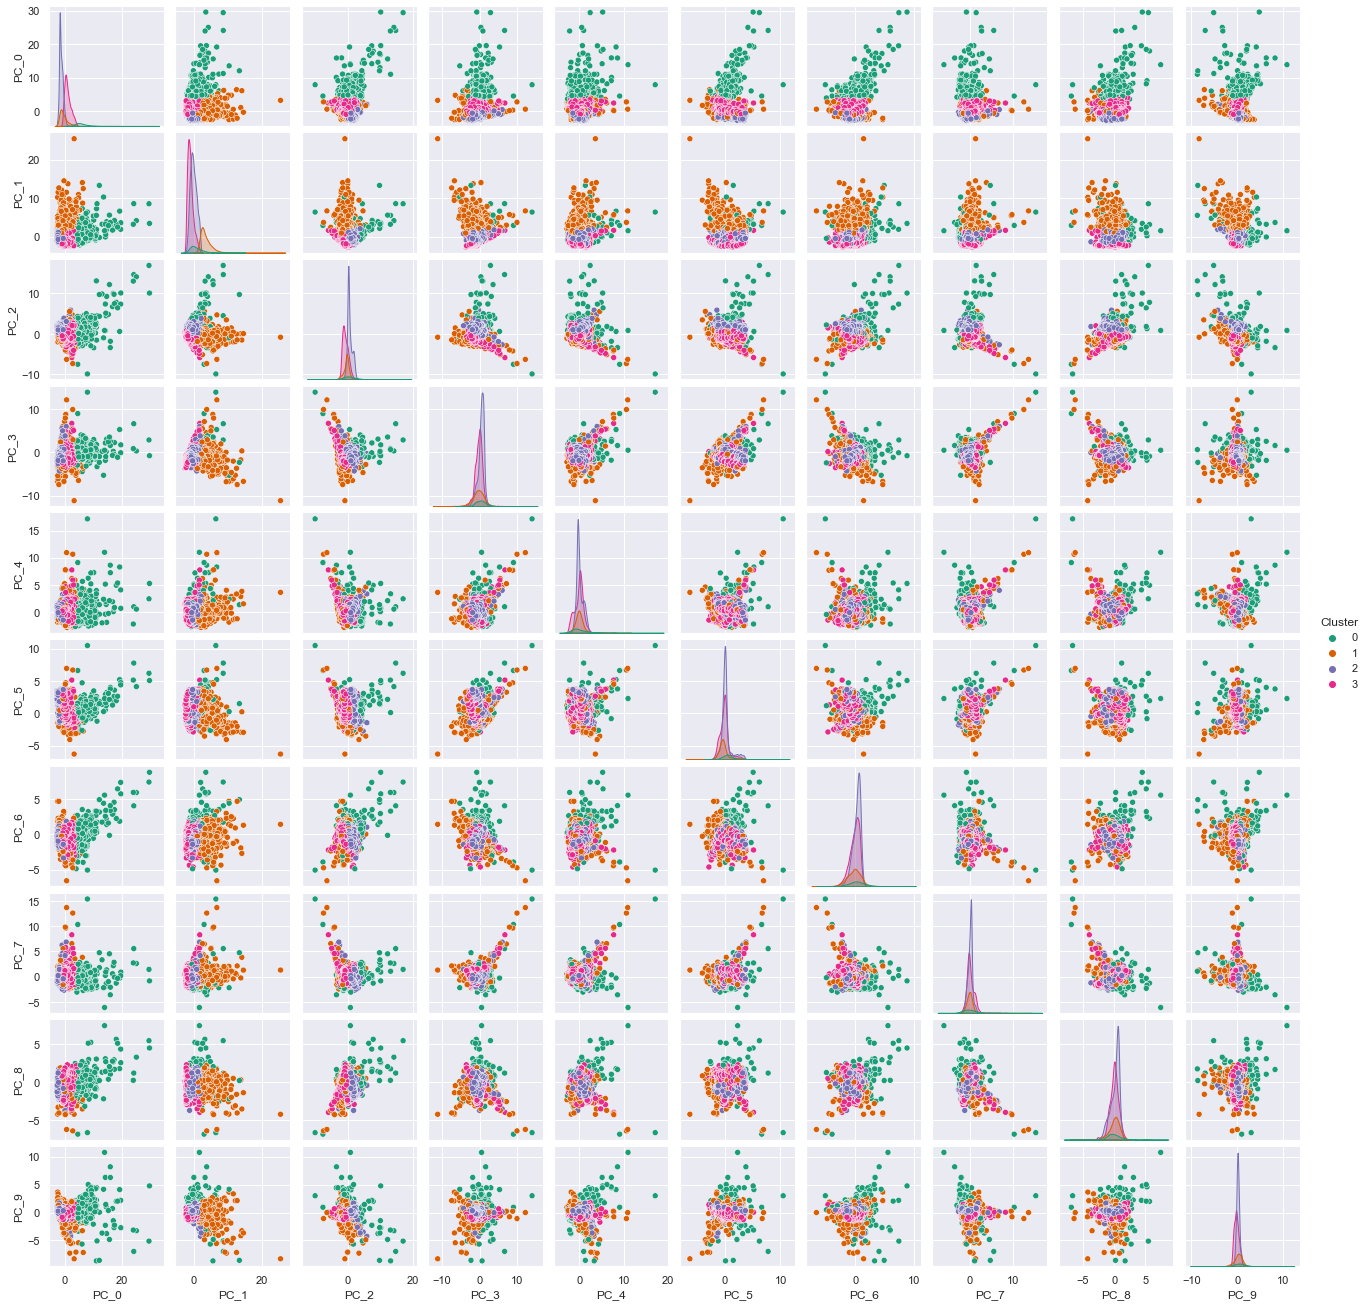

In [629]:
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00008B;">  5. Comment your findings and inferences and compare the performance. Does applying PCA give a better result in comparison to earlier? 

* From K-means algorithm,
  the optimal no.of clusters from siloutte score can be 3
* from elbow method it is 2 or 6 clusters
* But from PCA there are 9 components to be formed.